### k-Nearest Neighbors

Predict the label of a data point by:
- Looking at the k closest labeled data points
- Taking a majority vote

<https://youtu.be/HVXime0nQeI?si=r7MO6_inRUH0M3OA>

In [1]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x,y = data.data,data.target
print(x.shape,y.shape)

(569, 30) (569,)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train) # fit_transform is used to fit (fit means to calculate the mean and standard deviation) the data and transform it
x_test = sc.transform(x_test) # where transform is used to transform the data


In [9]:
x_test[0]

array([-0.46809882, -0.14171322, -0.44468042, -0.485979  ,  0.29337107,
        0.06406159, -0.09450341, -0.25211422,  0.46573459,  0.1555962 ,
       -0.02100539, -0.30104344, -0.17505169, -0.20519121, -0.02697634,
       -0.34352085, -0.17591476, -0.23558801, -0.33400142, -0.07333762,
       -0.26002114, -0.144002  , -0.32802893, -0.34684297,  0.49138024,
       -0.06654265, -0.00300662, -0.17331092,  0.22117163,  0.23655985])

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x_train, y_train)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[51  3]
 [ 3 86]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



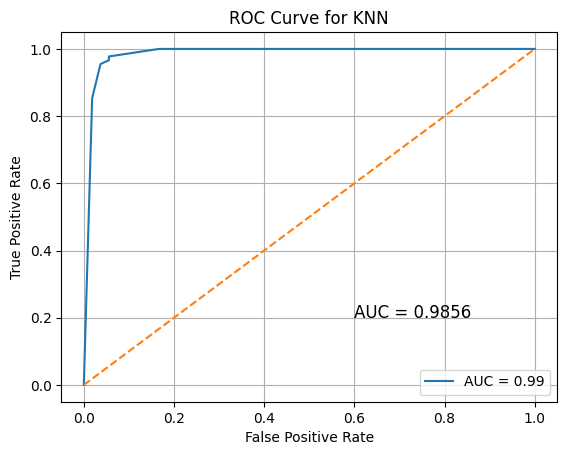

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.text(0.6, 0.2, f"AUC = {roc_auc_score(y_test, y_proba):.4f}", fontsize=12)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.legend()
plt.grid()
plt.show()
